In [ ]:
%pip install librosa

In [ ]:
%pip install tensorflow

In [634]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [635]:
import pandas as pd
metadata = pd.read_csv('./voices_dataset/speakers_all.csv')
metadata.head(10)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,False,NaN,NaN,NaN
1,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,False,NaN,NaN,NaN
2,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,False,NaN,NaN,NaN
3,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,False,NaN,NaN,NaN
4,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,False,NaN,NaN,NaN
5,25.0,15.0,"diekabo, ivory coast",agni1,agni,male,3,ivory coast,False,NaN,NaN,NaN
6,41.0,5.0,"accra, ghana",akan1,akan,male,979,ghana,False,NaN,NaN,NaN
7,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,4,kosovo,False,NaN,NaN,NaN
8,33.0,15.0,"tirana, albania",albanian2,albanian,male,5,albania,False,NaN,NaN,NaN
9,44.0,35.0,"tirana, albania",albanian3,albanian,male,458,albania,False,NaN,NaN,NaN


In [636]:
metadata['sex'].value_counts()

male      165
female    159
Name: sex, dtype: int64

In [637]:
from scipy.io import wavfile as wav
audio_file_path = './voices_dataset/recordings_wav/afrikaans1-gain.wav'
wave_sample_rate, wave_audio = wav.read(audio_file_path)
wave_audio

array([297, 361, 289, ..., -43, -44, -30], dtype=int16)

In [638]:
## Extract Features with mel frecuency
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=120)
print(mfccs.shape)

(120, 64)


In [639]:
mfccs

array([[-4.5422778e+02, -4.3037421e+02, -4.2775058e+02, ...,
        -2.7295145e+02, -2.6817365e+02, -2.8466031e+02],
       [ 8.4919144e+01,  9.0777885e+01,  9.0643349e+01, ...,
        -5.1337223e+01, -4.6608971e+01, -4.1464848e+01],
       [ 1.3826959e+01,  4.0114260e+00, -5.4782152e-02, ...,
         3.1453445e+01,  3.1073132e+01,  2.7846451e+01],
       ...,
       [ 6.8275148e-01, -4.3508619e-01, -2.3171997e-01, ...,
        -7.1324088e-02, -9.2634761e-01, -6.6484439e-01],
       [ 7.6945019e-01,  2.7311249e+00,  4.4854298e+00, ...,
         4.3530002e+00,  3.4343827e-01, -1.4366431e+00],
       [-1.0686591e+00,  8.1864405e-01,  2.3611231e+00, ...,
         2.6912813e+00,  2.2113490e+00,  1.4784992e+00]], dtype=float32)

In [640]:
## Extracting MFCC'S for every audio file
audio_dataset_path = './voices_dataset/recordings_wav/'

In [641]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [642]:
import numpy as np
import os
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),str(row["filename"]) + str('-gain.wav'))
    final_class_labels=row["sex"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

324it [02:01,  2.66it/s]


In [643]:
### converting extracted_features to pandas dataframe
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'sex'])
extracted_features_df.head(10)

,feature,sex
0,"[-283.23087, 102.62768, 12.898315, 43.4467, 5....",female
1,"[-252.67702, 99.67838, 0.25236192, 48.57197, 1...",male
2,"[-298.55328, 111.02149, 3.1944885, 43.253975, ...",male
3,"[-250.62463, 117.96664, 8.881133, 51.570305, 6...",male
4,"[-329.34845, 110.27477, 10.135183, 16.649261, ...",male
5,"[-342.6048, 115.30993, 27.493092, 38.891464, 2...",male
6,"[-272.452, 121.54236, -11.280892, 33.17854, -1...",male
7,"[-317.10226, 118.46592, 33.821987, 50.93314, 1...",male
8,"[-300.58844, 110.220085, -12.669221, 32.971092...",male
9,"[-344.4693, 127.844574, 1.8142115, 43.166576, ...",male


In [644]:
## Split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['sex'].tolist())

In [645]:
X

array([[-2.8323087e+02,  1.0262768e+02,  1.2898315e+01, ...,
        -7.3872417e-02, -2.5624046e-01, -1.1627328e-01],
       [-2.5267702e+02,  9.9678383e+01,  2.5236192e-01, ...,
         3.9229065e-01,  1.2871328e-01, -2.6076031e-01],
       [-2.9855328e+02,  1.1102149e+02,  3.1944885e+00, ...,
        -3.1353715e-01,  8.6076602e-02, -8.3893560e-02],
       ...,
       [-2.7833929e+02,  1.1956051e+02, -9.1505127e+00, ...,
        -1.4919461e-01,  4.5346174e-02, -2.1911344e-02],
       [-3.2879956e+02,  7.6274757e+01, -1.5254376e+01, ...,
        -1.5499321e-01,  1.6469675e-01, -4.2761363e-02],
       [-3.1463287e+02,  6.5860374e+01,  2.1336384e+00, ...,
        -4.0300153e-02, -1.2450830e-01,  2.4761696e-01]], dtype=float32)

In [646]:
X.shape

(324, 128)

In [647]:
### Label encoding
y = np.array(pd.get_dummies(y))

In [648]:
### Train Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [649]:
X_train.shape

(226, 128)

In [650]:
X_test.shape

(98, 128)

In [651]:
y_train.shape

(226, 2)

In [652]:
y_test.shape

(98, 2)

In [654]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [655]:
## number of patietsId
num_labels = y.shape[1]
num_labels

2

In [656]:
model = Sequential()
### first layer
model.add(Dense(200, input_shape=(128,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### third layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###fourth layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [657]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 200)               25800     
                                                                 
 activation_99 (Activation)  (None, 200)               0         
                                                                 
 dropout_84 (Dropout)        (None, 200)               0         
                                                                 
 dense_100 (Dense)           (None, 200)               40200     
                                                                 
 activation_100 (Activation)  (None, 200)              0         
                                                                 
 dropout_85 (Dropout)        (None, 200)               0         
                                                                 
 dense_101 (Dense)           (None, 200)             

In [658]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [659]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(
  X_train,
  y_train,
  batch_size=num_batch_size,
  epochs=num_epochs,
  validation_data=(X_test, y_test),
  callbacks=[checkpointer],
  verbose=1
)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
1/8 [==>...........................] - ETA: 4s - loss: 12.5796 - accuracy: 0.6250
Epoch 1: val_loss improved from inf to 2.56327, saving model to saved_models/audio_classification.hdf5
8/8 [==============================] - 1s 34ms/step - loss: 19.1561 - accuracy: 0.5133 - val_loss: 2.5633 - val_accuracy: 0.5000
Epoch 2/200
1/8 [==>...........................] - ETA: 0s - loss: 20.8343 - accuracy: 0.3438
Epoch 2: val_loss improved from 2.56327 to 1.24291, saving model to saved_models/audio_classification.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 17.3718 - accuracy: 0.4867 - val_loss: 1.2429 - val_accuracy: 0.4388
Epoch 3/200
1/8 [==>...........................] - ETA: 0s - loss: 18.7160 - accuracy: 0.3438
Epoch 3: val_loss did not improve from 1.24291
8/8 [==============================] - 0s 6ms/step - loss: 12.7506 - accuracy: 0.5000 - val_loss: 2.1021 - val_accuracy: 0.5000
Epoch 4/200
1/8 [==>...........................] - ETA: 0s - loss: 9.6882 -

In [660]:
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
test_accuracy

[0.13400864601135254, 0.9693877696990967]

In [661]:
### testing the model
test_filename = './voices_dataset/recordings_wav/afrikaans2-gain.wav'
audio, sample_rate = librosa.load(test_filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
# print(mfccs_scaled_features)

# using juts one item
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
#print(mfccs_scaled_features)
#print(mfccs_scaled_features.shape)

predicted_label = model.predict(mfccs_scaled_features)
predicted_classes = np.argmax(predicted_label, axis=1)
predicted_classes

array([1])

In [662]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(metadata['sex']))

prediction_class = labelencoder.inverse_transform(predicted_classes)
prediction_class

array(['male'], dtype=object)

In [663]:
metadata.head(10)

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,False,NaN,NaN,NaN
1,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,False,NaN,NaN,NaN
2,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,False,NaN,NaN,NaN
3,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,False,NaN,NaN,NaN
4,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,False,NaN,NaN,NaN
5,25.0,15.0,"diekabo, ivory coast",agni1,agni,male,3,ivory coast,False,NaN,NaN,NaN
6,41.0,5.0,"accra, ghana",akan1,akan,male,979,ghana,False,NaN,NaN,NaN
7,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,4,kosovo,False,NaN,NaN,NaN
8,33.0,15.0,"tirana, albania",albanian2,albanian,male,5,albania,False,NaN,NaN,NaN
9,44.0,35.0,"tirana, albania",albanian3,albanian,male,458,albania,False,NaN,NaN,NaN


In [664]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

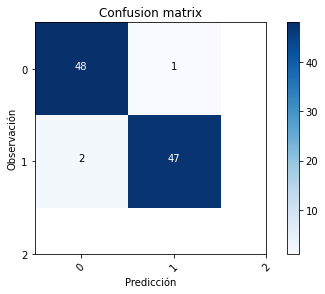

In [665]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))